In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("synthetic_dataset_30000.csv")

# Parse types for new columns
if "Order date" in df.columns:
    df["Order date"] = pd.to_datetime(df["Order date"], errors="coerce")

cat_cols = [
    "Customer ID","Supplier ID","Shipping ID","Manufacturing ID","SKU",
    "Location","Shipping carriers","Availability","Inspection results"
]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")

# Descriptive statistics
desc_stats = df.describe()
median = df.select_dtypes(include='number').median()

print("📊 Descriptive Statistics:")
print(desc_stats)

print("\n📍 Median values:")
print(median)


📊 Descriptive Statistics:
                       Order date         Price  Number of products sold  \
count                       30000  30000.000000             30000.000000   
mean   2024-10-12 00:20:12.480000    186.102214               486.896000   
min           2023-10-17 00:00:00      5.000000                 0.000000   
25%           2024-04-12 00:00:00     61.575000               350.000000   
50%           2024-10-13 00:00:00    119.795000               470.000000   
75%           2025-04-14 00:00:00    258.572500               623.000000   
max           2025-10-16 00:00:00    799.970000              1350.000000   
std                           NaN    178.025971               196.242834   

       Revenue generated  Stock levels    Lead times  Order quantities  \
count       30000.000000  30000.000000  30000.000000      30000.000000   
mean        68210.563405    342.716900     10.745600         92.507433   
min             0.000000      0.000000      1.000000          1.000

In [3]:
corr = df['Price'].corr(df['Number of products sold'])
print("Correlation Price vs Number of products sold:", corr)

Correlation Price vs Number of products sold: -0.6407724167894537


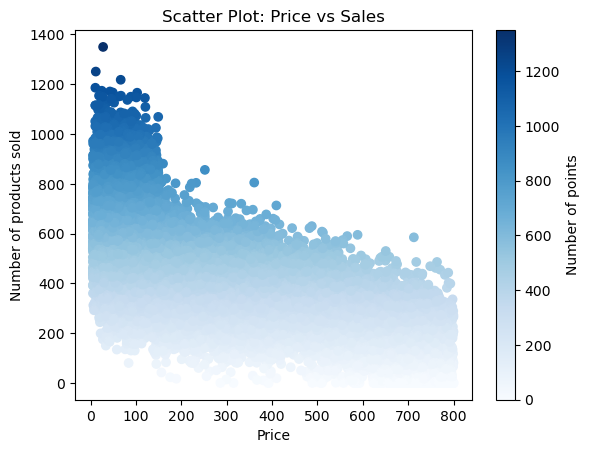

In [4]:
plt.scatter(df['Price'], df['Number of products sold'], c=df['Number of products sold'], cmap='Blues')
plt.colorbar(label="Number of points")
plt.xlabel("Price")
plt.ylabel("Number of products sold")
plt.title("Scatter Plot: Price vs Sales")
plt.show()

In [5]:
corr = df['Lead times'].corr(df['Number of products sold'])
print("Correlation Lead Time vs Units Sold:", corr)

Correlation Lead Time vs Units Sold: 0.001410537082294172


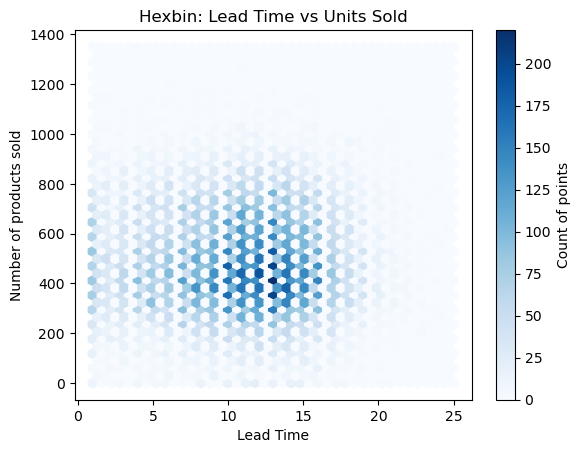

In [6]:
plt.hexbin(
    df['Lead times'], 
    df['Number of products sold'], 
    gridsize=40, 
    cmap="Blues"
)
plt.colorbar(label="Count of points")
plt.xlabel("Lead Time")
plt.ylabel("Number of products sold")
plt.title("Hexbin: Lead Time vs Units Sold")
plt.show()

In [7]:
supplier_shipping = df.groupby('Location')['Shipping costs'].mean()

print("📊 Average Shipping Cost by Supplier Location:")
print(supplier_shipping)

📊 Average Shipping Cost by Supplier Location:
Location
China      77.719492
Egypt      64.743943
Germany    60.215412
India      69.348641
USA        43.102699
Name: Shipping costs, dtype: float64


C:\Users\arsan\AppData\Local\Temp\ipykernel_19088\3601286355.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  supplier_shipping = df.groupby('Location')['Shipping costs'].mean()


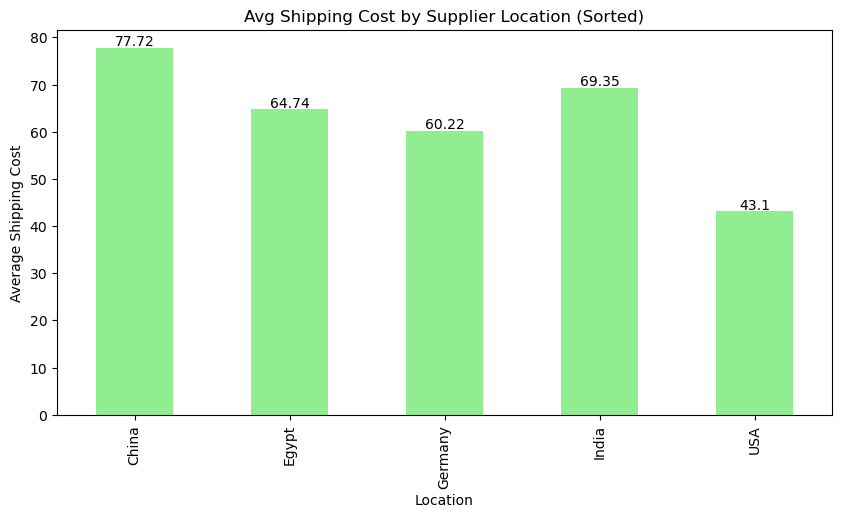

In [8]:
ax = supplier_shipping.plot(kind='bar', figsize=(10,5), color="lightgreen")
plt.ylabel("Average Shipping Cost")
plt.title("Avg Shipping Cost by Supplier Location (Sorted)")

for i, v in enumerate(supplier_shipping):
    ax.text(i, v + 0.5, round(v,2), ha='center')

plt.show()

C:\Users\arsan\AppData\Local\Temp\ipykernel_19088\968318644.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(


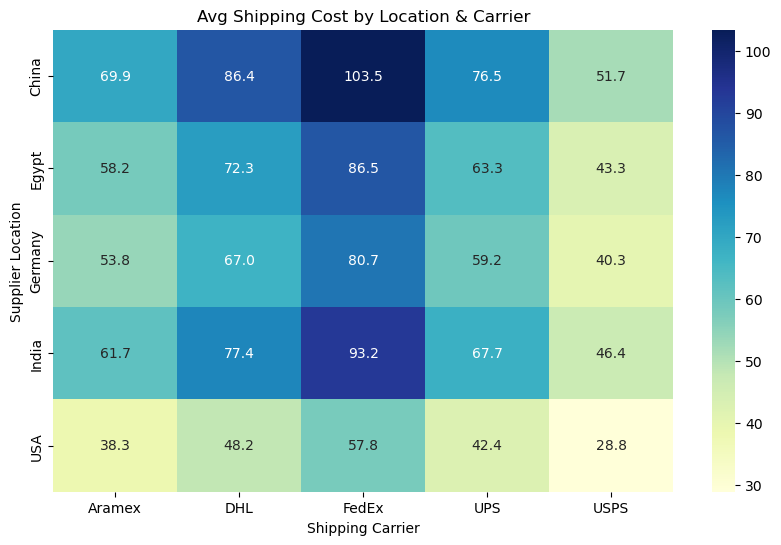

In [9]:
pivot_data = df.pivot_table(
    values="Shipping costs",
    index="Location",
    columns="Shipping carriers",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Avg Shipping Cost by Location & Carrier")
plt.ylabel("Supplier Location")
plt.xlabel("Shipping Carrier")
plt.show()

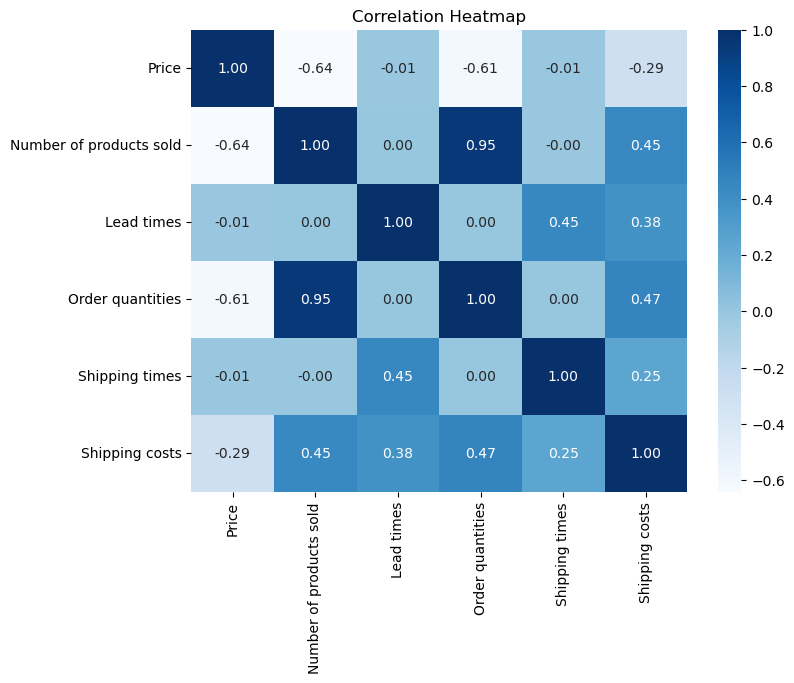

In [10]:
cols = ["Price", "Number of products sold", "Lead times", 
        "Order quantities", "Shipping times", "Shipping costs"]

corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\arsan\AppData\Local\Temp\ipykernel_19088\855100616.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.dropna(subset=["Order date"]).set_index("Order date").resample("M")
C:\Users\arsan\AppData\Local\Temp\ipykernel_19088\855100616.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_per_customer = df.groupby("Customer ID").size().describe()
C:\Users\arsan\AppData\Local\Temp\ipykernel_19088\855100616.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  demo_loc_sales = df.pivot_table(values="Revenue generated", index="Customer demographics", columns="Location", agg


ID coverage/uniqueness: {'n_customers': 4979, 'n_suppliers': 5, 'shipping_id_unique': True, 'manufacturing_id_unique': True}

Orders per customer (distribution):
 count    4979.000000
mean        6.025306
std         2.782847
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        20.000000
dtype: float64


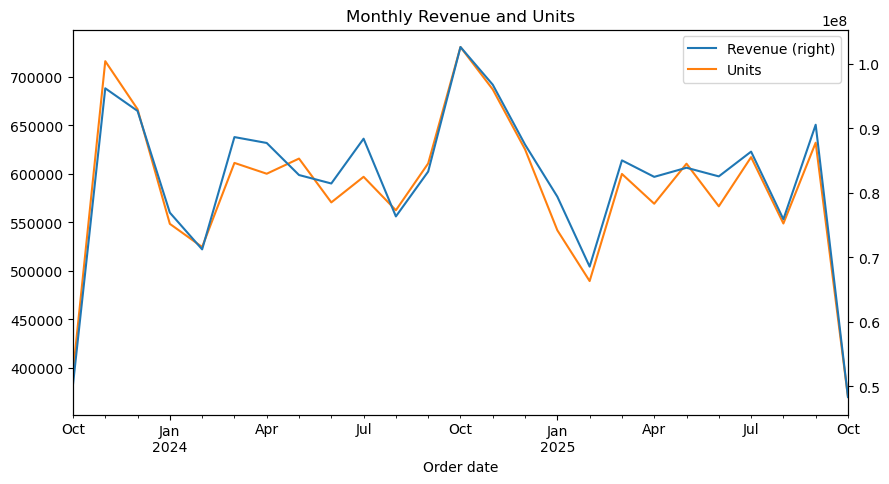

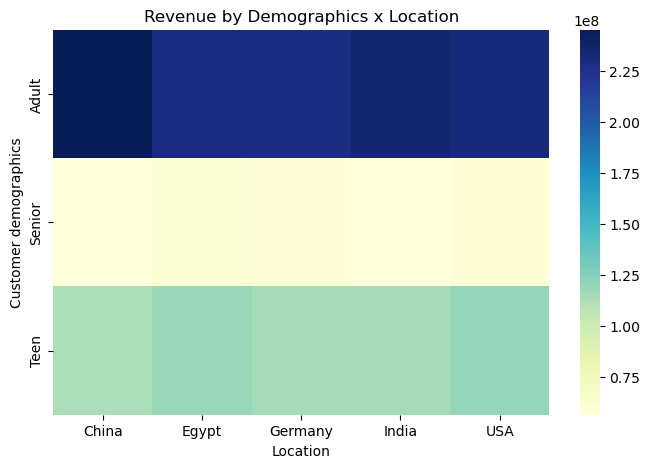

In [11]:
# Monthly trend (Revenue and Units)
if "Order date" in df.columns:
    monthly = (
        df.dropna(subset=["Order date"]).set_index("Order date").resample("M")
          .agg({"Revenue generated":"sum","Number of products sold":"sum"})
          .rename(columns={"Revenue generated":"Revenue","Number of products sold":"Units"})
    )
    ax = monthly.plot(figsize=(10,5), secondary_y=["Revenue"], title="Monthly Revenue and Units")

# ID uniqueness checks
checks = {
    "n_customers": df["Customer ID"].nunique() if "Customer ID" in df.columns else None,
    "n_suppliers": df["Supplier ID"].nunique() if "Supplier ID" in df.columns else None,
    "shipping_id_unique": df["Shipping ID"].is_unique if "Shipping ID" in df.columns else None,
    "manufacturing_id_unique": df["Manufacturing ID"].is_unique if "Manufacturing ID" in df.columns else None,
}
print("\nID coverage/uniqueness:", checks)

# Customer analysis: Orders per customer and sales by demographics x location
if "Customer ID" in df.columns:
    orders_per_customer = df.groupby("Customer ID").size().describe()
    print("\nOrders per customer (distribution):\n", orders_per_customer)

if {"Customer demographics","Location"}.issubset(df.columns):
    demo_loc_sales = df.pivot_table(values="Revenue generated", index="Customer demographics", columns="Location", aggfunc="sum")
    plt.figure(figsize=(8,5))
    sns.heatmap(demo_loc_sales, annot=False, cmap="YlGnBu")
    plt.title("Revenue by Demographics x Location")
    plt.show()
